In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms

from collections import OrderedDict
import cv2
import numpy as np
from functools import partial

import matplotlib.pyplot as plt
import vgg16 as vgg16_model
import vgg16_deconv as vgg16deconv_model

In [2]:
def save(model):
    def hook(module, input, output, key):
        if isinstance(module, nn.MaxPool2d):
            model.feature_maps[key] = output[0]
            model.pool_switch[key] = output[1]
        else:
            model.feature_maps[key] = output
    
    for i, layer in enumerate(model._modules.get('features')):
        layer.register_forward_hook(partial(hook,key=i))

In [3]:
def layerDeconv(layer_idx, conv, deconv):
    print(conv.feature_maps[layer_idx].shape)
    num_fmap = conv.feature_maps[layer_idx].shape[1]
    print(num_fmap)
    copy_fmap = conv.feature_maps[layer_idx].clone()
    
    max_list = []
    for i in range(num_fmap):
        each_fmap = copy_fmap[0,i,:,:]
        max_list.append(torch.max(each_fmap))
    #print(max_list)
    
    max_fnumber = np.argmax(np.array(max_list))
    
    print(copy_fmap[0,max_fnumber,:,:].shape)
    
    # set all feature_map 0 except max_feature_map
    for i in range(max_fnumber):
        copy_fmap[0,i,:,:] = 0
    for i in range(max_fnumber+1,num_fmap):
        copy_fmap[0,i,:,:] = 0
    
    #print(copy_fmap[0,max_fnumber-1,:,:])
    #print(copy_fmap[0,max_fnumber,:,:])
    #print(copy_fmap[0,max_fnumber+1,:,:])
    
    
    # set max_feature_map 0 except maximum value
    max_fmap = copy_fmap[0,max_fnumber,:,:]
    max_val = torch.max(max_fmap)
    
    #print(max_fmap)
    max_fmap = torch.where(max_fmap==max_val, max_fmap, torch.zeros(max_fmap.shape))
    #print(max_fmap)
    
    copy_fmap[0,max_fnumber,:,:] = max_fmap
    
    deconv_output = deconv(copy_fmap, layer_idx, conv.pool_switch)
    print(deconv_output.shape)
    return deconv_output

In [4]:
def visualize(deconv_output):
    #print(deconv_output[0].shape)
    deconv_img = deconv_output[0].data.numpy()
    new_img = np.transpose(deconv_img, (1,2,0))

    new_img = cv2.normalize(new_img, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

    temp = new_img[0,0,0]
    leftx = 244
    lefty = 244
    rightx = 0
    righty = 0
    for i in range(224):
        for j in range(224):
            if new_img[i,j,0] > temp+0.1 or new_img[i,j,0] < temp-0.1:
                leftx = min(i,leftx)
                lefty = min(j,lefty)
                rightx = max(i,rightx)
                righty = max(j,righty)

    print(leftx,lefty, rightx, righty)
    
    maximum = 243
    minimum = 0
    leftx = max(min(leftx-5,maximum),minimum)
    lefty = max(min(lefty-5,maximum),minimum)
    rightx = max(min(rightx+5,maximum),minimum)
    righty = max(min(righty+5,maximum),minimum)
        
    deconv = new_img[leftx:rightx, lefty:righty, :]
    original = ori_img[leftx:rightx, lefty:righty, :]

    #plt.subplot(1, 2, 1)
    #plt.imshow(temp)
    #plt.subplot(1, 2, 2)
    #plt.imshow(ori_img[leftx-5:rightx+5, lefty-5:righty+5, :])
    return deconv, original

torch.Size([1, 64, 224, 224])
64
torch.Size([224, 224])
30
torch.Size([1, 3, 224, 224])
149 19 151 21
torch.Size([1, 64, 224, 224])
64
torch.Size([224, 224])
28
torch.Size([1, 3, 224, 224])
114 53 115 55
torch.Size([1, 128, 112, 112])
128
torch.Size([112, 112])
25
torch.Size([1, 3, 224, 224])
97 6 102 11
torch.Size([1, 128, 112, 112])
128
torch.Size([112, 112])
23
torch.Size([1, 3, 224, 224])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


135 3 140 8
torch.Size([1, 256, 56, 56])
256
torch.Size([56, 56])
20
torch.Size([1, 3, 224, 224])
134 2 142 12
torch.Size([1, 256, 56, 56])
256
torch.Size([56, 56])
18
torch.Size([1, 3, 224, 224])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


16 96 29 109
torch.Size([1, 256, 56, 56])
256
torch.Size([56, 56])
16
torch.Size([1, 3, 224, 224])
80 72 98 89
torch.Size([1, 512, 28, 28])
512
torch.Size([28, 28])
13
torch.Size([1, 3, 224, 224])
114 50 132 63
torch.Size([1, 512, 28, 28])
512
torch.Size([28, 28])
11
torch.Size([1, 3, 224, 224])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


104 32 131 69
torch.Size([1, 512, 28, 28])
512
torch.Size([28, 28])
9
torch.Size([1, 3, 224, 224])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


116 50 140 70
torch.Size([1, 512, 14, 14])
512
torch.Size([14, 14])
6
torch.Size([1, 3, 224, 224])
64 77 140 149
torch.Size([1, 512, 14, 14])
512
torch.Size([14, 14])
4
torch.Size([1, 3, 224, 224])
42 71 120 130
torch.Size([1, 512, 14, 14])
512
torch.Size([14, 14])
2
torch.Size([1, 3, 224, 224])
33 32 136 130


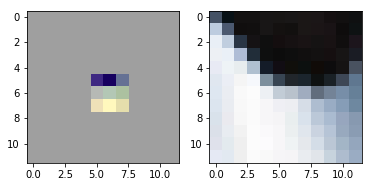

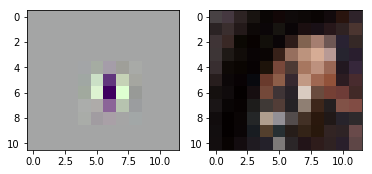

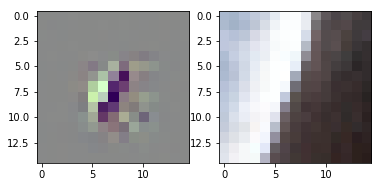

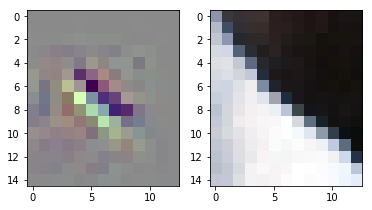

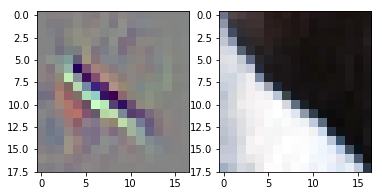

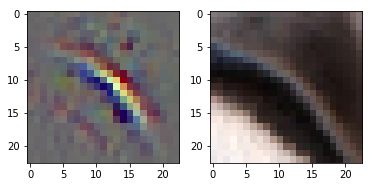

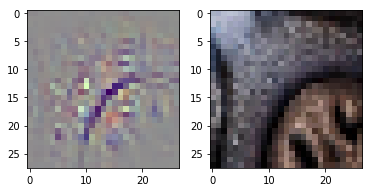

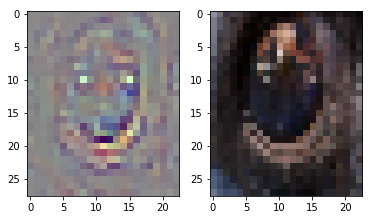

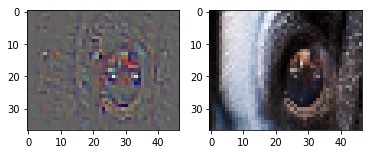

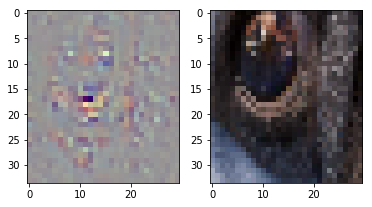

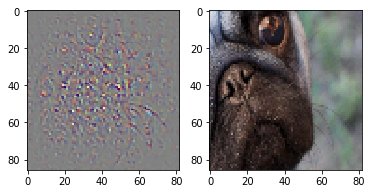

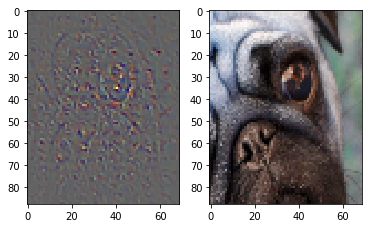

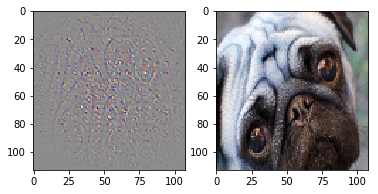

In [5]:
ori_img = cv2.imread('../data/deconv/pug.jpg')
ori_img = cv2.resize(ori_img, (224,224))
#print(ori_img.shape)
#plt.imshow(ori_img)

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])
img = transform(ori_img)
img = img.unsqueeze_(0)

vgg16 = vgg16_model.VGG16()
save(vgg16)

output = vgg16(img)

vgg16deconv = vgg16deconv_model.VGG16_Deconv()

convLayer_idx = list(vgg16deconv.index_mapping.keys())
#print(map_idx)
#convLayer_idx = [0,2,5,7,10,12,14,17]
num_layer = len(convLayer_idx)

"""
deconv_output = layerDeconv(7,vgg16,vgg16deconv)
deconv, original = visualize(deconv_output)
plt.subplot(num_layer, 2, 1)
plt.imshow(deconv)
plt.subplot(num_layer, 2, 2)
plt.imshow(original)

    
"""

for i,layer in enumerate(convLayer_idx):
    plt.figure(i)
    deconv_output = layerDeconv(layer,vgg16,vgg16deconv)
    deconv, original = visualize(deconv_output)
    plt.subplot(1, 2, 1)
    plt.imshow(deconv)
    plt.subplot(1, 2, 2)
    plt.imshow(original)

torch.Size([1, 64, 224, 224])
64
torch.Size([224, 224])
30
torch.Size([1, 3, 224, 224])
71 204 73 206
torch.Size([1, 64, 224, 224])
64
torch.Size([224, 224])
28
torch.Size([1, 3, 224, 224])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


212 64 214 65
torch.Size([1, 128, 112, 112])
128
torch.Size([112, 112])
25
torch.Size([1, 3, 224, 224])
219 173 223 180
torch.Size([1, 128, 112, 112])
128
torch.Size([112, 112])
23
torch.Size([1, 3, 224, 224])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


199 85 202 87
torch.Size([1, 256, 56, 56])
256
torch.Size([56, 56])
20
torch.Size([1, 3, 224, 224])
216 47 223 54
torch.Size([1, 256, 56, 56])
256
torch.Size([56, 56])
18
torch.Size([1, 3, 224, 224])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


59 91 72 103
torch.Size([1, 256, 56, 56])
256
torch.Size([56, 56])
16
torch.Size([1, 3, 224, 224])
76 152 89 163
torch.Size([1, 512, 28, 28])
512
torch.Size([28, 28])
13
torch.Size([1, 3, 224, 224])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


75 146 91 164
torch.Size([1, 512, 28, 28])
512
torch.Size([28, 28])
11
torch.Size([1, 3, 224, 224])
71 136 100 170
torch.Size([1, 512, 28, 28])
512
torch.Size([28, 28])
9
torch.Size([1, 3, 224, 224])
73 145 100 180
torch.Size([1, 512, 14, 14])
512
torch.Size([14, 14])
6
torch.Size([1, 3, 224, 224])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


68 120 131 181
torch.Size([1, 512, 14, 14])
512
torch.Size([14, 14])
4
torch.Size([1, 3, 224, 224])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


39 112 120 183
torch.Size([1, 512, 14, 14])
512
torch.Size([14, 14])
2
torch.Size([1, 3, 224, 224])
20 88 108 169


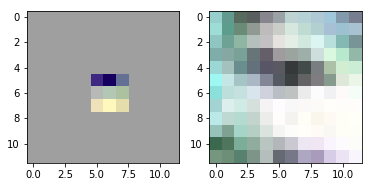

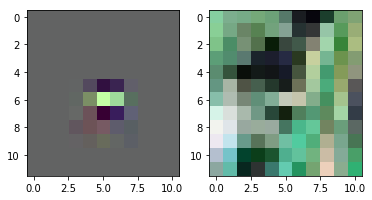

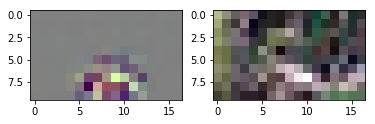

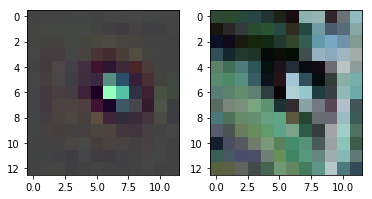

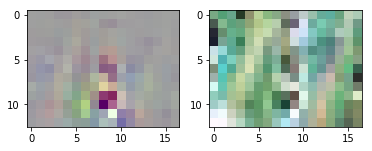

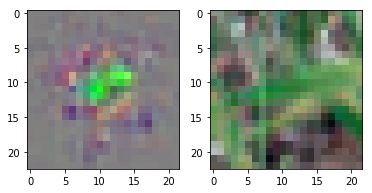

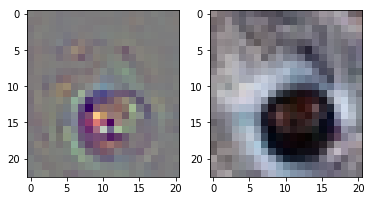

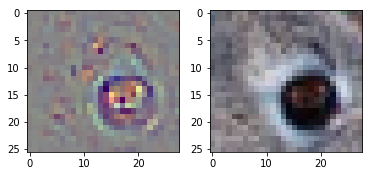

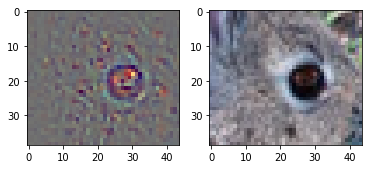

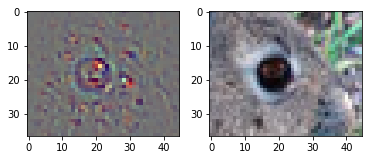

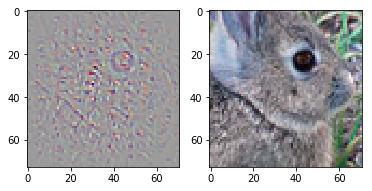

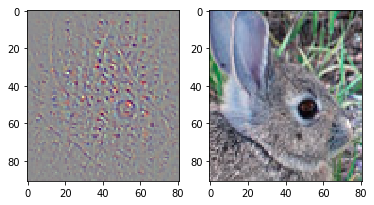

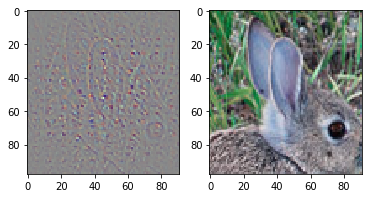

In [6]:
ori_img = cv2.imread('../data/deconv/rabbit.jpg')
ori_img = cv2.resize(ori_img, (224,224))

img = transform(ori_img)
img = img.unsqueeze_(0)

output = vgg16(img)


for i,layer in enumerate(convLayer_idx):
    plt.figure(i)
    deconv_output = layerDeconv(layer,vgg16,vgg16deconv)
    deconv, original = visualize(deconv_output)
    plt.subplot(1, 2, 1)
    plt.imshow(deconv)
    plt.subplot(1, 2, 2)
    plt.imshow(original)
    